# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)

        status_code = response.status_code

        # Handle failed requests
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Sleep for 1 second
    time.sleep(1)
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao tome
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | cable beach
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | greenland
Processing Record 12 of Set 1 | riviere-du-loup
Processing Record 13 of Set 1 | taiohae
Processing Record 14 of Set 1 | nguigmi
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | shajiang
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | nouadhibou
Processing Record 23 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao tome,0.3365,6.7273,77.02,82.0,56.0,9.06,ST,1.717961e+09
1,hithadhoo,-0.6000,73.0833,83.16,73.0,100.0,3.91,MV,1.717961e+09
2,cable beach,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,afaahiti,-17.7500,-149.2833,78.67,84.0,100.0,16.78,PF,1.717961e+09
4,stanley,54.8680,-1.6985,54.99,70.0,20.0,8.05,GB,1.717961e+09


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_price.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_price.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao tome,0.3365,6.7273,77.02,82.0,56.0,9.06,ST,1.717961e+09
1,hithadhoo,-0.6000,73.0833,83.16,73.0,100.0,3.91,MV,1.717961e+09
2,cable beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afaahiti,-17.7500,-149.2833,78.67,84.0,100.0,16.78,PF,1.717961e+09
4,stanley,54.8680,-1.6985,54.99,70.0,20.0,8.05,GB,1.717961e+09


In [11]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 583
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        584 non-null    object 
 1   Lat         555 non-null    float64
 2   Lng         555 non-null    float64
 3   Max Temp    555 non-null    float64
 4   Humidity    555 non-null    float64
 5   Cloudiness  555 non-null    float64
 6   Wind Speed  555 non-null    float64
 7   Country     547 non-null    object 
 8   Date        555 non-null    float64
dtypes: float64(7), object(2)
memory usage: 45.6+ KB


In [115]:
# Find NaN values in Lat
city_data_df.loc[pd.isnull(city_data_df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cable beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,vingt cinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,devinuwara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,espargos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,am djarass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,fuvahmulah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,bayan nur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop NaN values
clean_city_data_df = city_data_df.dropna(how="any").reset_index()

clean_city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     547 non-null    int64  
 1   City        547 non-null    object 
 2   Lat         547 non-null    float64
 3   Lng         547 non-null    float64
 4   Max Temp    547 non-null    float64
 5   Humidity    547 non-null    float64
 6   Cloudiness  547 non-null    float64
 7   Wind Speed  547 non-null    float64
 8   Country     547 non-null    object 
 9   Date        547 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 42.9+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

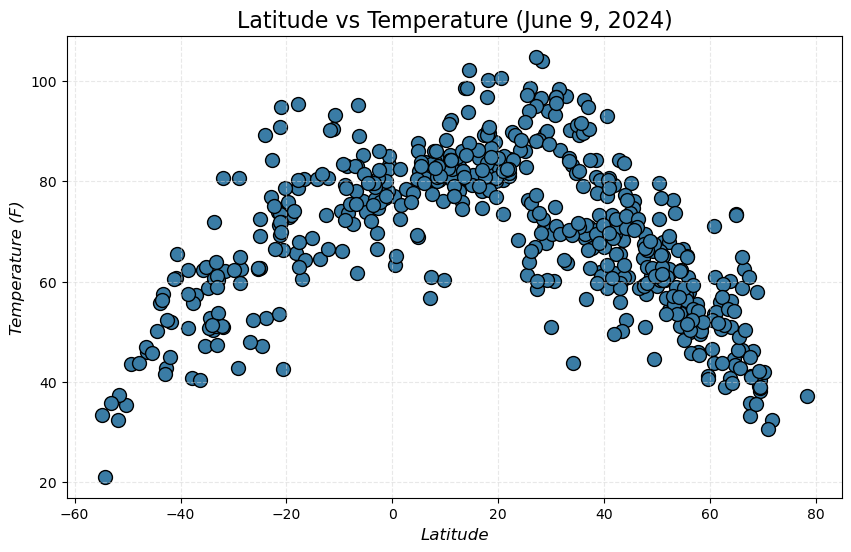

In [37]:
# Build scatter plot for latitude vs. temperature
x = clean_city_data_df.Lat
y = clean_city_data_df["Max Temp"]

plt.figure(figsize=(10,6))
plt.scatter(x, y, facecolor="#3a7ca5", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature (June 9, 2024)", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1_price.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

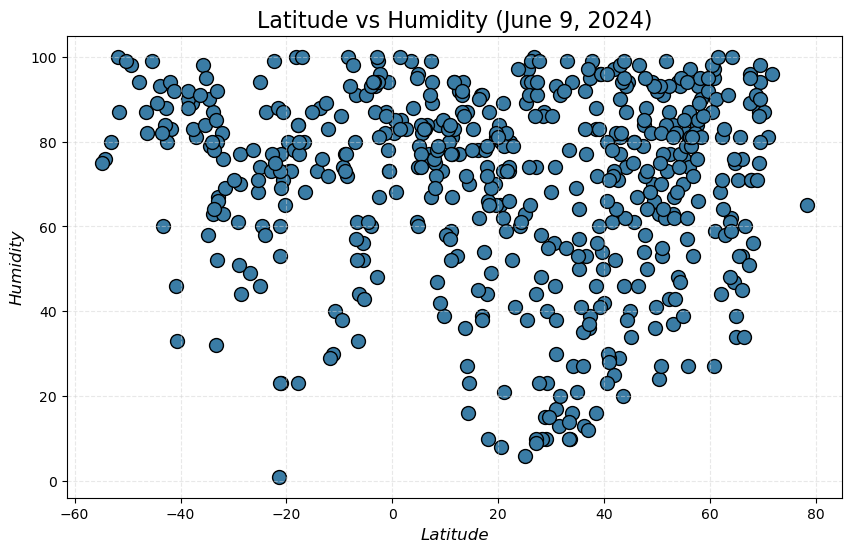

In [36]:
# Build the scatter plots for latitude vs. humidity
x = clean_city_data_df.Lat
y = clean_city_data_df.Humidity

plt.figure(figsize=(10,6))
plt.scatter(x, y, facecolor="#3a7ca5", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity (June 9, 2024)", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2_price.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

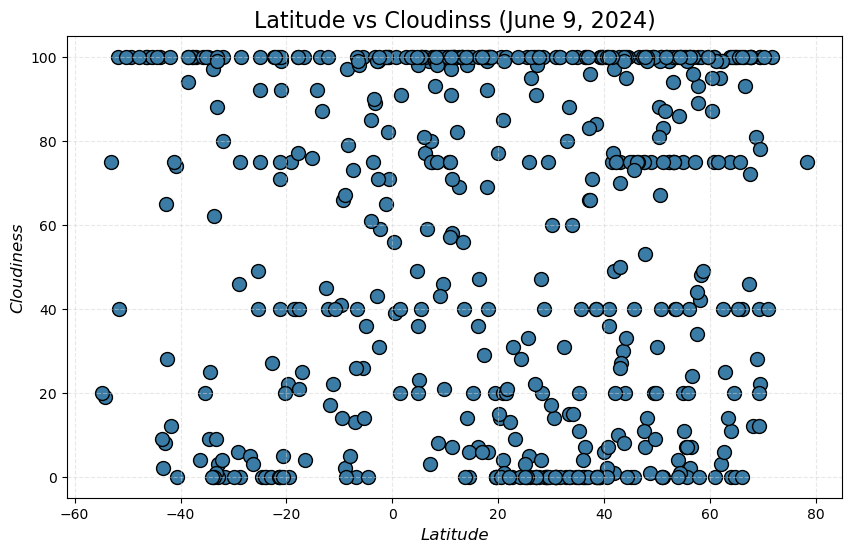

In [35]:
# Build the scatter plots for latitude vs. cloudiness
x = clean_city_data_df.Lat
y = clean_city_data_df.Cloudiness

plt.figure(figsize=(10,6))
plt.scatter(x, y, facecolor="#3a7ca5", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudinss (June 9, 2024)", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3_price.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

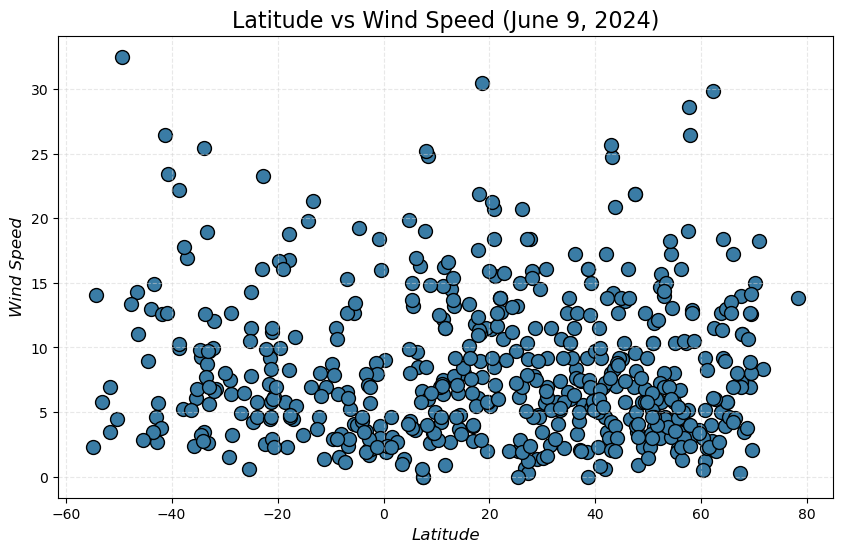

In [34]:
# Build the scatter plots for latitude vs. wind speed
x = clean_city_data_df.Lat
y = clean_city_data_df["Wind Speed"]

plt.figure(figsize=(10,6))
plt.scatter(x, y, facecolor="#3a7ca5", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed (June 9, 2024)", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("output_data/Fig4_price.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    
    # Line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Calculate predictions
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_value = "The r-value is: " + str(rvalue**2)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, facecolor="#3a7ca5", edgecolor="black", s=100)
    # Plot the line of best fit
    plt.plot(x_values, regress_values, "r-") 
    
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.suptitle(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    # Plot the r-value
    plt.title(r_value, y=1, x=0.2, fontsize=12, color="black")
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    # Plot line equation
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")

    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = clean_city_data_df.loc[clean_city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,sao tome,0.3365,6.7273,77.02,82.0,56.0,9.06,ST,1.717961e+09
3,4,stanley,54.8680,-1.6985,54.99,70.0,20.0,8.05,GB,1.717961e+09
4,5,ust-nera,64.5667,143.2000,44.51,47.0,100.0,3.91,RU,1.717961e+09
7,8,portland,45.5234,-122.6762,75.99,61.0,40.0,5.75,US,1.717961e+09
9,10,greenland,43.0362,-70.8328,65.46,81.0,75.0,8.05,US,1.717961e+09


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = clean_city_data_df.loc[clean_city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,hithadhoo,-0.6000,73.0833,83.16,73.0,100.0,3.91,MV,1.717961e+09
2,3,afaahiti,-17.7500,-149.2833,78.67,84.0,100.0,16.78,PF,1.717961e+09
5,6,grytviken,-54.2811,-36.5092,21.06,76.0,19.0,14.03,GS,1.717961e+09
6,7,port-aux-francais,-49.3500,70.2167,43.57,98.0,100.0,32.50,TF,1.717961e+09
8,9,uturoa,-16.7333,-151.4333,80.55,80.0,100.0,10.78,PF,1.717961e+09


###  Temperature vs. Latitude Linear Regression Plot

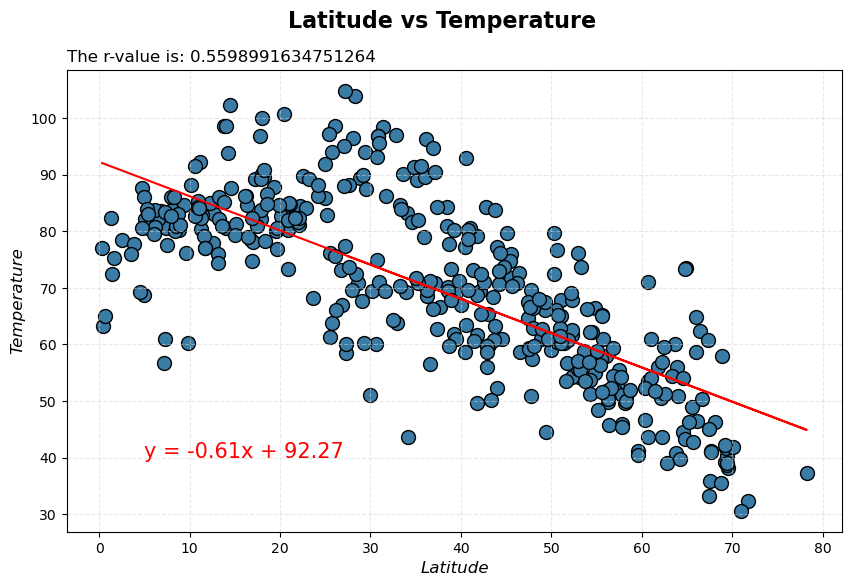

In [90]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (5, 40))

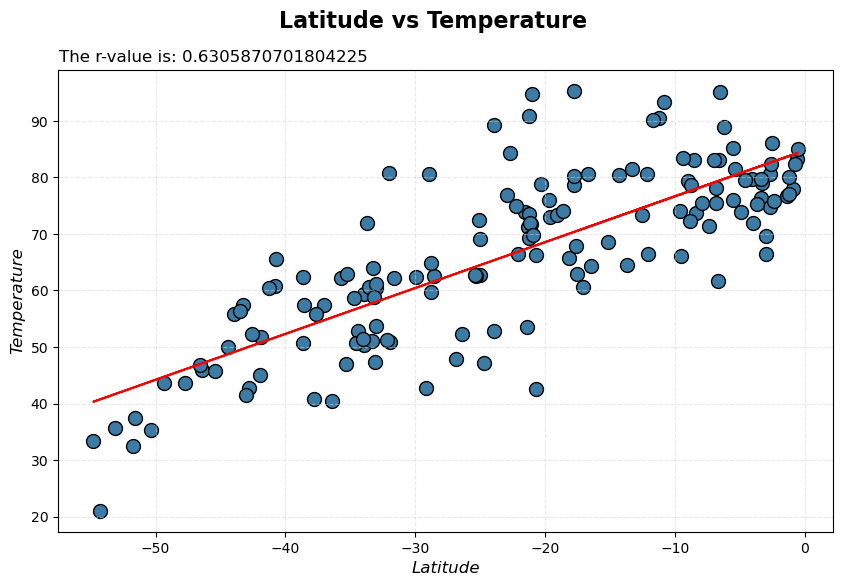

In [91]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (5, 40))

**Discussion about the linear relationship:** 

There is a strong correlation between latitude and temperature. The northern hemisphere has a negative coorelation, where temperature decreases as latitude increases.  Conversly, the southern hemisphere has a positive correlation, where the temperature increases as latitude increases.


### Humidity vs. Latitude Linear Regression Plot

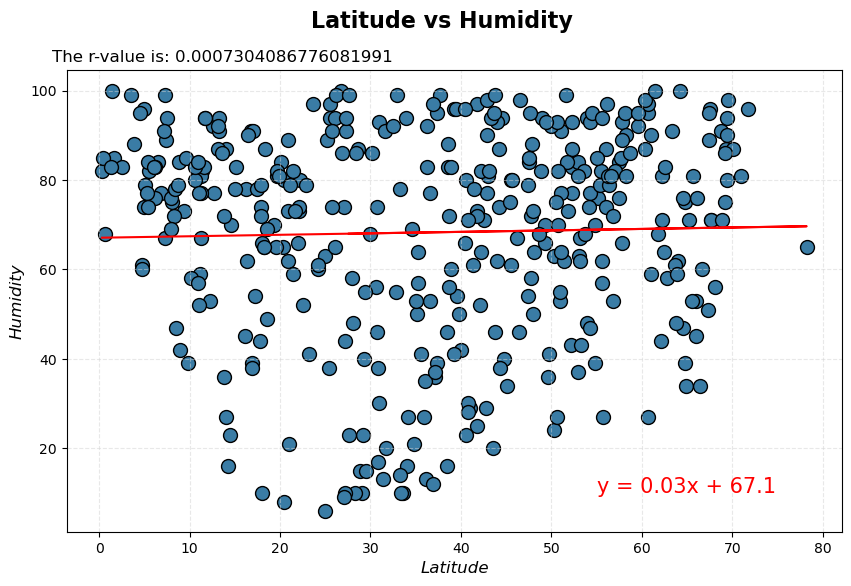

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity

doRegression(x_values, y_values, "Latitude", "Humidity", (55, 10))

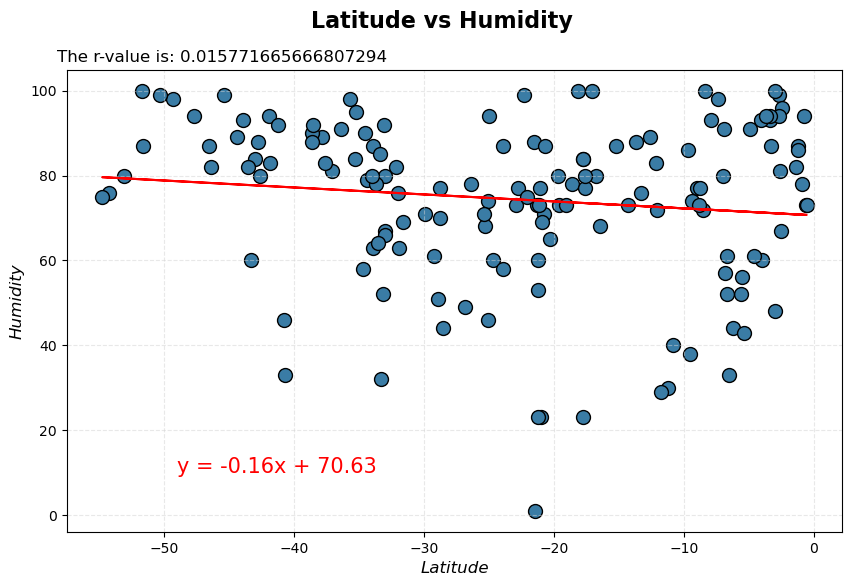

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity

doRegression(x_values, y_values, "Latitude", "Humidity", (-49, 10))

**Discussion about the linear relationship:** 

There is no correlation betwen latitude and humidity as evidenced by the scatter plot and the low r-value.

### Cloudiness vs. Latitude Linear Regression Plot

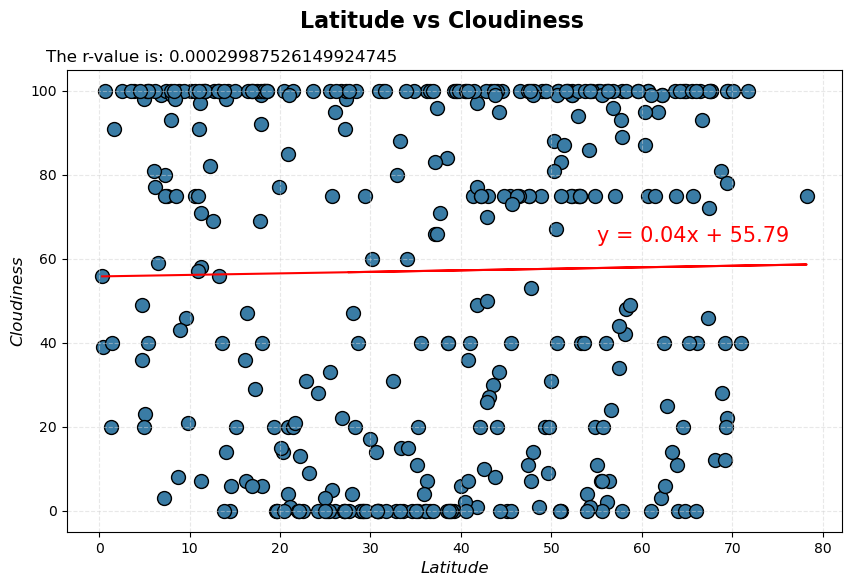

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness

doRegression(x_values, y_values, "Latitude", "Cloudiness", (55, 64))

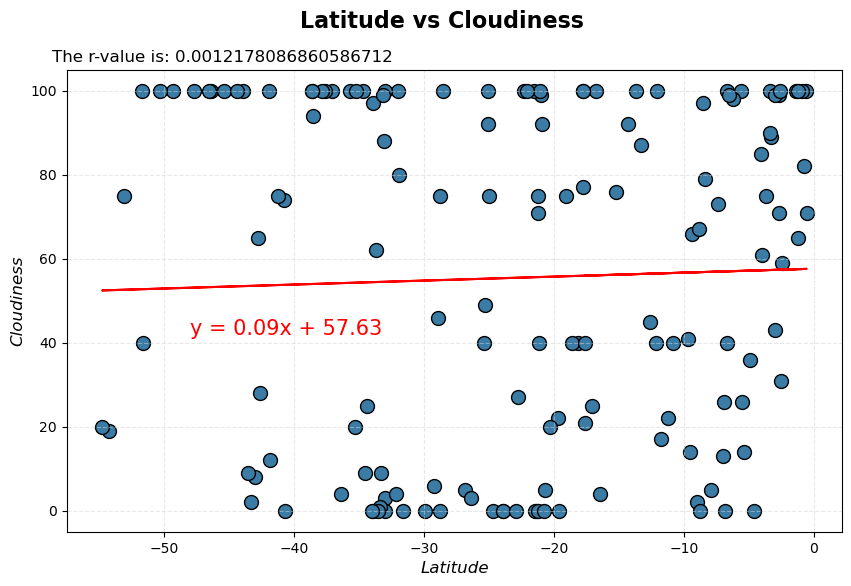

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness

doRegression(x_values, y_values, "Latitude", "Cloudiness", (-48, 42))

**Discussion about the linear relationship:** 

There is no correlation betwen latitude and cloudiness as evidenced by the scatter plot and the low r-value.

### Wind Speed vs. Latitude Linear Regression Plot

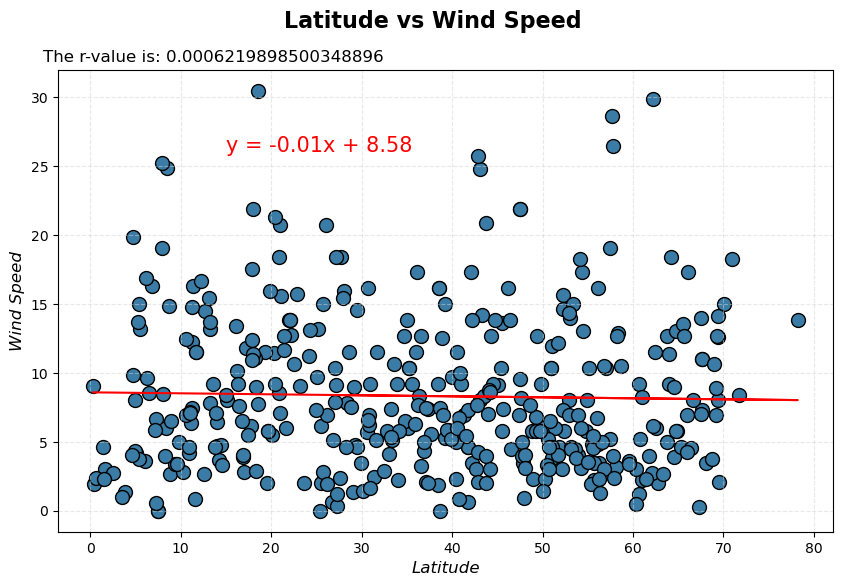

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (15, 26))

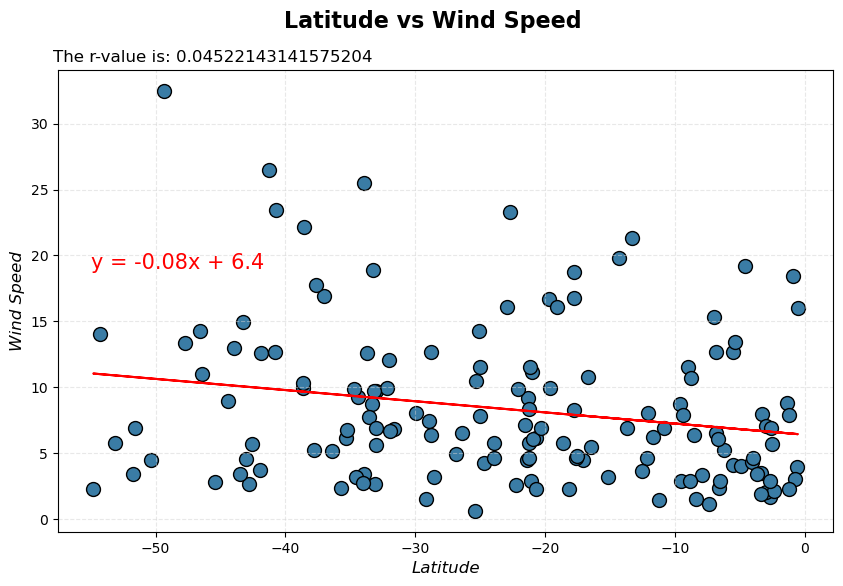

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (-55, 19))

**Discussion about the linear relationship:** 

There is no correlation betwen latitude and wind speed as evidenced by the scatter plot and the low r-value.